In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import quandl
import pickle
import os

quandl.ApiConfig.api_key = 'yQaxzc5rcgC8Hyt8SSdz'

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import mpld3
from matplotlib import style

mpld3.enable_notebook()
# style.use('fivethirtyeight')
style.use('ggplot')

Generally, no, you don't really need to do that digging, we know the factors. The factors for home prices are governed by: The economy, interest rates, and demographics. These are the three major influences in general for real estate value. Now, of course, if you're buying land, various other things matter, how level is it, are we going to need to do some work to the land before we can actually lay foundation, how is drainage etc. If there is a house, then we have even more factors, like the roof, windows, heating/AC, floors, foundation, and so on. We can begin to consider these factors later, but first we'll start at the macro level. You will see how quickly our data sets inflate here as it is, it'll blow up fast.



quandl.get() irá obter os dados da base do quandl <br>
Precisamos buscar o HPI de <strong>todos os Estados dos EUA</strong>


# Mas quais são todos os Estados?
Como esse projeto é com Pandas, podemos usá-lo para buscar os dados para nós também.<br>
Imagina ter que buscar cada um manualmente :/

### Wikipedia <3
É possível buscar os dados de uma página HTML da Wikipedia<br>
Com o pandas, é possível ler arquivos HTML para extrair informações também.<br><br>
A lista de todos os estados está disponível <a href="https://simple.wikipedia.org/wiki/List_of_U.S._states">aqui</a>

Foram desenvolvidas funções auxiliares para carregar esses dados.

In [5]:
from utils.load_data import load_state_names
hpi_states = load_state_names()

['FMAC/HPI_AL', 'FMAC/HPI_AK', 'FMAC/HPI_AZ', 'FMAC/HPI_AR', 'FMAC/HPI_CA', 'FMAC/HPI_CO', 'FMAC/HPI_CT', 'FMAC/HPI_DE', 'FMAC/HPI_FL', 'FMAC/HPI_GA', 'FMAC/HPI_HI', 'FMAC/HPI_ID', 'FMAC/HPI_IL', 'FMAC/HPI_IN', 'FMAC/HPI_IA', 'FMAC/HPI_KS', 'FMAC/HPI_KY', 'FMAC/HPI_LA', 'FMAC/HPI_ME', 'FMAC/HPI_MD', 'FMAC/HPI_MA', 'FMAC/HPI_MI', 'FMAC/HPI_MN', 'FMAC/HPI_MS', 'FMAC/HPI_MO', 'FMAC/HPI_MT', 'FMAC/HPI_NE', 'FMAC/HPI_NV', 'FMAC/HPI_NH', 'FMAC/HPI_NJ', 'FMAC/HPI_NM', 'FMAC/HPI_NY', 'FMAC/HPI_NC', 'FMAC/HPI_ND', 'FMAC/HPI_OH', 'FMAC/HPI_OK', 'FMAC/HPI_OR', 'FMAC/HPI_PA', 'FMAC/HPI_RI', 'FMAC/HPI_SC', 'FMAC/HPI_SD', 'FMAC/HPI_TN', 'FMAC/HPI_TX', 'FMAC/HPI_UT', 'FMAC/HPI_VT', 'FMAC/HPI_VA', 'FMAC/HPI_WA', 'FMAC/HPI_WV', 'FMAC/HPI_WI', 'FMAC/HPI_WY']


## Concatenar 50 DataFrames !
Para realizar a análise de todos os estados, é necessário carregar cada DF e concatená-los em um só

In [6]:
def grab_initial_state(pickle_file, hpi_states,
                        pct_change=False, rolling=False):
    
    if os.path.exists(pickle_file) and os.path.getsize(pickle_file) > 0:
        pickle_in = open(pickle_file,'rb')
        df = pickle.load(pickle_in)
        return df
    
    main_df = pd.DataFrame()
    for hpi_state in hpi_states:
        state_abbv = hpi_state[-2:]
        df = quandl.get(hpi_state)

        df.drop('NSA Value', axis=1, inplace=True)

        # col_name = 'SA Value ' + state_abbv
        columns = [state_abbv]
        df.columns = columns

        if pct_change:
            df = df.pct_change()
        if rolling:
            df[col_name] = (df[col_name] - df[col_name][0]) / df[col_name][0] * 100

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)

    pickle_out = open(pickle_file, 'wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()
    return main_df

In [8]:
HPI_data = grab_initial_state('states.pickle', hpi_states)
HPI_data.head()

AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.815181  34.635041  28.987589  36.973729  15.713967  19.674800   
1975-02-28  35.996150  35.103649  29.513849  37.269509  15.781333  19.850458   
1975-03-31  36.152053  35.478493  29.960071  37.508531  15.937745  20.010090   
1975-04-30  36.353666  35.852334  30.250744  37.714662  16.207431  20.191505   
1975-05-31  36.530967  36.261457  30.327989  37.884955  16.442426  20.329326   

                   CT         DE         FL         GA    ...             SD  \
Date                                                      ...                  
1975-01-31  24.510315  27.168749  30.941494  30.723301    ...      37.679225   
1975-02-28  24.987193  27.272418  32.288936  30.354031    ...      37.217163   
1975-03-31  25.335666  27.298625  34.036705  30.192714    ...      36.689573   
1975-04-30  25.500429  27.432293  36.164568  30.183180    ...      36.155625   
1975-05-31  25.527977  27.624711  36.245468  30.239690    ...      35.667658   

                   TN         TX         UT         VT         VA         WA  \
Date                                                                           
1975-01-31  32.409436  32.621858  24.774819  27.855697  27.753395  17.483631   
1975-02-28  32.395681  32.902972  25.094385  28.148160  28.044597  17.595601   
1975-03-31  32.373367  33.371425  25.315659  28.378879  28.245137  17.686085   
1975-04-30  32.415880  34.180239  25.500668  28.580896  28.328788  17.787128   
1975-05-31  32.467205  34.358025  25.568554  28.769595  28.427380  17.853439   

                   WV         WI         WY  
Date                                         
1975-01-31  40.712480  27.984644  31.367555  
1975-02-28  41.761971  28.369646  31.861900  
1975-03-31  42.736719  28.667432  32.353070  
1975-04-30  43.746198  28.901994  32.812993  
1975-05-31  44.831289  29.049183  33.204046  

[5 rows x 50 columns]

# Pickle
Iremos escrever os dados da API em um arquivo binário. <br>
Isso irá facilitar o carregamento dos dados, pois não será necessário fazer várias requisições para a web

## Visualização dos Dados

## Dados Brutos
Esses são os dados brutos retornados da API

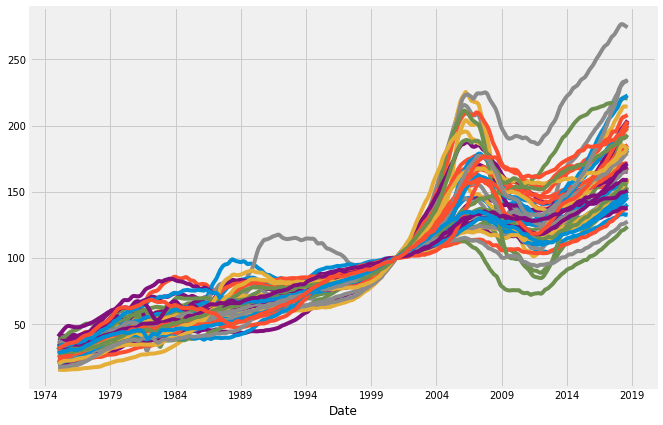

In [9]:
HPI_data.plot(figsize=(10, 7))
plt.legend().remove()
plt.show()

# Estatística Descritiva

In [10]:
HPI_data.describe()

AL          AK          AZ          AR          CA          CO  \
count  525.000000  525.000000  525.000000  525.000000  525.000000  525.000000   
mean    88.757496  103.534772   96.263951   91.822266  100.248930   81.857187   
std     31.337967   43.177783   47.714620   31.272518   61.106436   44.790061   
min     35.815181   34.635041   28.567386   36.973729   15.713967   19.674800   
25%     61.430234   71.539633   62.641458   67.508169   47.294197   44.428147   
50%     87.749343   87.974986   80.567987   89.072474   78.056330   70.964445   
75%    118.214492  153.660730  125.191559  124.262683  142.557907  115.938671   
max    146.022627  178.548657  204.003223  147.329721  234.540901  202.299273   

               CT          DE          FL          GA     ...              SD  \
count  525.000000  525.000000  525.000000  525.000000     ...      525.000000   
mean    94.257063   97.207655  102.232286   81.981096     ...       91.913730   
std     40.850200   47.107792   53.068509   32.347876     ...       40.068080   
min     24.510315   27.168749   30.941494   29.362424     ...       34.967349   
25%     62.209170   54.039664   61.636320   56.560462     ...       57.114851   
50%     91.340597   83.666913   80.416595   77.907514     ...       84.899657   
75%    131.091346  145.973959  135.374317  108.846045     ...      132.209624   
max    163.195736  177.303972  225.359937  153.635540     ...      181.312004   

               TN          TX          UT          VT          VA          WA  \
count  525.000000  525.000000  525.000000  525.000000  525.000000  525.000000   
mean    89.449581   95.437670   89.403500   99.780324  102.234471   93.300249   
std     35.970468   38.870593   45.070712   48.940955   52.745741   55.164115   
min     32.373367   32.621858   24.774819   27.855697   27.753395   17.483631   
25%     58.329853   68.710303   49.373002   53.676011   55.679834   40.928579   
50%     86.626979   80.250919   89.866716   83.608279   81.515490   79.444767   
75%    121.233139  125.705783  124.854327  157.339749  157.809903  138.626983   
max    171.248456  200.340707  203.051359  183.781713  192.973645  233.493655   

               WV          WI          WY  
count  525.000000  525.000000  525.000000  
mean    94.399137   84.402295  103.281907  
std     31.932876   36.008372   50.734487  
min     40.712480   27.984644   31.367555  
25%     65.657488   47.909225   61.878537  
50%     90.717629   82.754910   86.158087  
75%    129.790159  119.475705  161.825366  
max    150.925436  148.021446  200.174257  

[8 rows x 50 columns]

Iremos selecionar uma parte da população inicial para realizarmos a análise descritiva. <br>
Como são 50 estados, escolheremos os 10 com preços mais altos ao longo dos anos para analisar

In [16]:
sorted_df = HPI_data.reindex(HPI_data.mean().sort_values().index, axis=1)
most_ten_high = sorted_df.iloc[:, 0:10]

most_ten_high.head()

MI         OH         CO         GA         IN         IL  \
Date                                                                           
1975-01-31  24.644710  30.305346  19.674800  30.723301  32.607730  25.703732   
1975-02-28  24.945701  30.306552  19.850458  30.354031  33.071352  25.763983   
1975-03-31  25.081965  30.351568  20.010090  30.192714  33.422369  25.931137   
1975-04-30  25.109612  30.497213  20.191505  30.183180  33.693991  26.043513   
1975-05-31  25.038892  30.686937  20.329326  30.239690  33.825730  26.105502   

                   WI         MN         NC         KY  
Date                                                    
1975-01-31  27.984644  25.385231  28.376990  31.404873  
1975-02-28  28.369646  25.639245  28.756743  31.438590  
1975-03-31  28.667432  25.827806  29.044540  31.464173  
1975-04-30  28.901994  25.981574  29.203207  31.518110  
1975-05-31  29.049183  26.149370  29.367468  31.728526

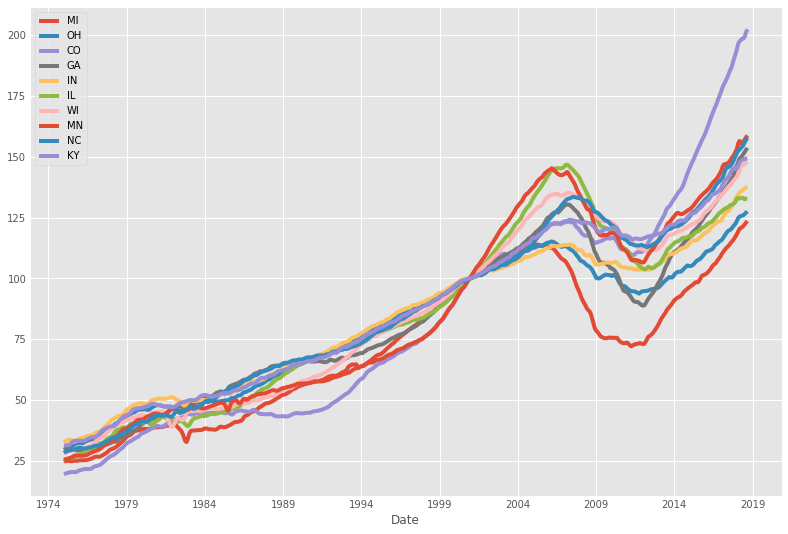

In [24]:
most_ten_high.plot(figsize=(12,9))
plt.show()

## Amplitude
A amplitude é a diferença entre o maior e menor valor

MI     98.965627
OH     97.231899
CO    182.624473
GA    124.273116
IN    105.136138
IL    121.016850
WI    120.036802
MN    133.358288
NC    129.379315
KY    117.888047
dtype: float64


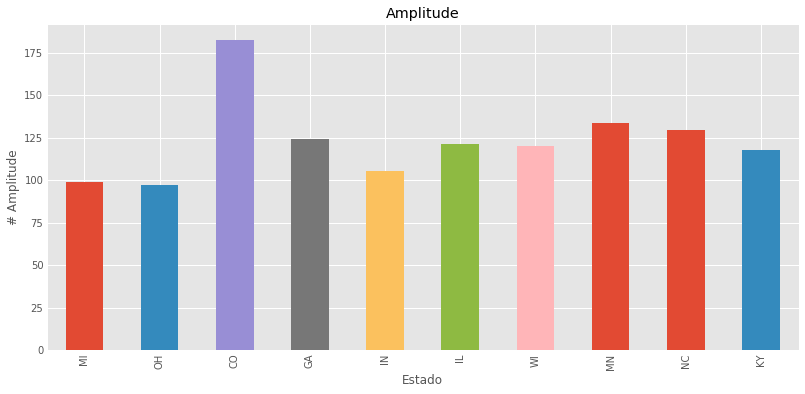

In [27]:
amp = most_ten_high.max() - most_ten_high.min()
amp.plot(kind='bar', figsize=(12, 6))
print(amp)

plt.title('Amplitude')
plt.xlabel('Estado')
plt.ylabel('# Amplitude')
plt.show()

## Variância
A variância indica quanto os valores estão distantes do esperado

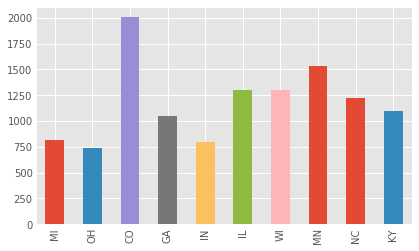

In [29]:
most_ten_high.var().plot(kind='bar')
plt.show()

# Covariância e Correlação dos Dados
<strong>Explicar o que é covariância e correlação</strong>

In [18]:
most_ten_high.corr()

MI        OH        CO        GA        IN        IL        WI  \
MI  1.000000  0.977989  0.891927  0.958333  0.956304  0.942374  0.936300   
OH  0.977989  1.000000  0.927153  0.979018  0.992914  0.978514  0.979755   
CO  0.891927  0.927153  1.000000  0.958594  0.955683  0.916715  0.953848   
GA  0.958333  0.979018  0.958594  1.000000  0.980246  0.976292  0.977981   
IN  0.956304  0.992914  0.955683  0.980246  1.000000  0.972927  0.985834   
IL  0.942374  0.978514  0.916715  0.976292  0.972927  1.000000  0.990474   
WI  0.936300  0.979755  0.953848  0.977981  0.985834  0.990474  1.000000   
MN  0.934860  0.963528  0.964065  0.982945  0.969333  0.981868  0.989078   
NC  0.919931  0.973298  0.964742  0.983943  0.988635  0.975756  0.988424   
KY  0.924495  0.976138  0.970821  0.977196  0.992612  0.973111  0.991505   

          MN        NC        KY  
MI  0.934860  0.919931  0.924495  
OH  0.963528  0.973298  0.976138  
CO  0.964065  0.964742  0.970821  
GA  0.982945  0.983943  0.977196  
IN  0.969333  0.988635  0.992612  
IL  0.981868  0.975756  0.973111  
WI  0.989078  0.988424  0.991505  
MN  1.000000  0.977331  0.979711  
NC  0.977331  1.000000  0.996320  
KY  0.979711  0.996320  1.000000

# Média dos valores dos Estados Unidos

# Percent Change
Calcular o percentual de mudança dos dados ao longo dos anos

# Rolling
Iremos buscar quanto os dados variaram em relação ao primeiro ano

In [10]:
HPI_rolling_data = grab_initial_state('states_rolling_pct.pickle',
                                     hpi_states, rolling=True)

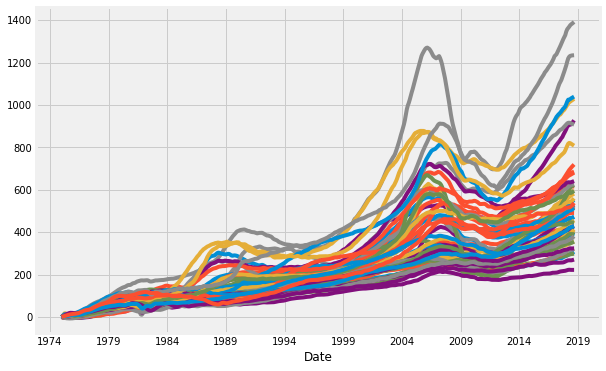

In [11]:
HPI_rolling_data.plot(figsize=(9, 6))
plt.legend().remove()
plt.show()

In [12]:
def HPI_benchmark(pickle_file: str):
    
    if os.path.exists(pickle_file) and os.path.getsize(pickle_file) > 0:
        pickle_in = open(pickle_file,'rb')
        df = pickle.load(pickle_in)
        return df

    df = quandl.get('FMAC/HPI_USA')
    
    df.drop('NSA Value', axis=1,inplace=True)
    df.columns = ['USA']
    df['USA'] = (df['USA'] - df['USA'][0]) / df['USA'][0] * 100
    
    # salvar em arquivo binario
    out = open(pickle_file, 'wb')
    pickle.dump(df, out)
    out.close()

    return df

In [13]:
USA_data = HPI_benchmark('USA.pickle')

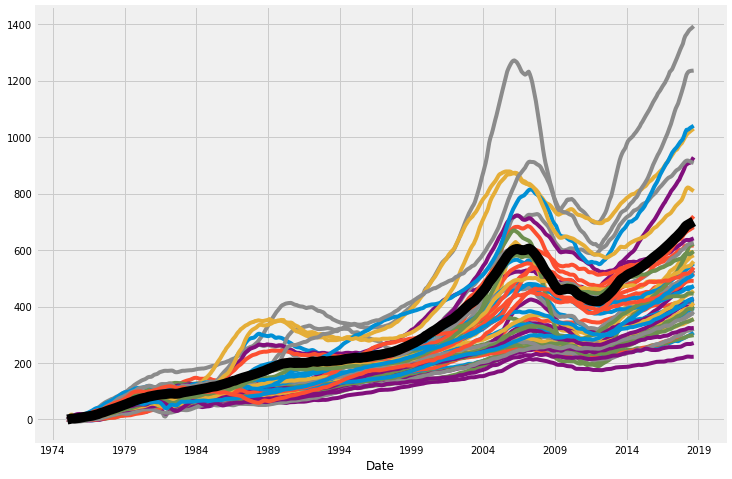

In [14]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_rolling_data.plot(ax=ax1, figsize=(11, 8))
USA_data.plot(color='k',ax=ax1, linewidth=10)

plt.legend().remove()
plt.show()